In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('my_CustomerDemographic table.xlsx')
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [3]:
#Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [4]:
df.gender.value_counts()

Female    2037
Male      1872
U           88
Femal        1
M            1
F            1
Name: gender, dtype: int64

In [5]:
replace_values_gender = {"F": "Female","Femal": "Female", "M": "Male"}
df.gender = df.gender.replace(replace_values_gender)
df.gender.value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [6]:
df['past_3_years_bike_related_purchases'].value_counts()

16    56
19    56
20    54
67    54
2     50
      ..
8     28
86    27
95    27
85    27
92    24
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

In [7]:
df['DOB'].value_counts()

1978-01-30    7
1977-05-13    4
1976-07-16    4
1978-08-19    4
1976-09-25    4
             ..
1974-06-16    1
1969-11-21    1
1961-11-24    1
1995-05-03    1
1972-04-14    1
Name: DOB, Length: 3448, dtype: int64

In [8]:
df['job_title'].value_counts()

Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Legal Assistant                         41
                                        ..
Programmer Analyst IV                    4
Health Coach III                         3
Research Assistant III                   3
Health Coach I                           3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [9]:
df["job_industry_category"].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [10]:
df["wealth_segment"].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [11]:
df["deceased_indicator"].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [12]:
df = df[df["deceased_indicator"] != 'Y']

In [13]:
df["deceased_indicator"].value_counts()

N    3998
Name: deceased_indicator, dtype: int64

In [14]:
df["default"].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
â°â´âµâââ                                  53
                                         ... 
-0.5                                       31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

In [15]:
#Remove the DEFAULT label because it doesn't contain useful information
df = df.drop("default", axis = 1)

In [16]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [17]:
df["owns_car"].value_counts()

Yes    2022
No     1976
Name: owns_car, dtype: int64

In [18]:
df["tenure"].value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
14.0    200
9.0     199
13.0    191
6.0     191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

In [19]:
#Checking the missing values 
df.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [20]:
df["job_title"]

0          Executive Secretary
1       Administrative Officer
2           Recruiting Manager
3                          NaN
4                Senior Editor
                 ...          
3995     VP Product Management
3996           Statistician II
3997         Assistant Manager
3998                       NaN
3999      Software Engineer IV
Name: job_title, Length: 3998, dtype: object

In [21]:
#Filling the missing values (forward fillin and backward filling methods)
# with ffill method 
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

first_name
last_name
gender
job_title
job_industry_category
wealth_segment
deceased_indicator
owns_car


In [22]:
#Check fot he columns which have null values 
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        if pd.isnull(content).sum():
            print(label)

last_name
job_title
job_industry_category


In [23]:
#Now let's fill in the missing string values 
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        if pd.isnull(content).sum():
            #Fill in the missing string variables 
            df[label] = content.fillna(method = "ffill")
            

In [24]:
df.isna().sum()

customer_id                             0
first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    87
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                 87
dtype: int64

In [25]:
#Check for datetime data type columns which have null values 
for label, content in df.items():
    if pd.api.types.is_datetime64_dtype(content):
        if pd.isnull(content).sum():
            print(label)

DOB


In [26]:
#Fill in the missing values of the DOB 
for label, content in df.items():
    if pd.api.types.is_datetime64_dtype(content):
        if pd.isnull(content).sum():
            df[label] = content.fillna(method = "ffill")

In [27]:
df.isna().sum()

customer_id                             0
first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                     0
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                 87
dtype: int64

In [28]:
#Last nmis, sing variable "tenure" fill in the missing values 
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label] = content.fillna(content.median())

In [29]:
df.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3998 non-null   int64         
 1   first_name                           3998 non-null   object        
 2   last_name                            3998 non-null   object        
 3   gender                               3998 non-null   object        
 4   past_3_years_bike_related_purchases  3998 non-null   int64         
 5   DOB                                  3998 non-null   datetime64[ns]
 6   job_title                            3998 non-null   object        
 7   job_industry_category                3998 non-null   object        
 8   wealth_segment                       3998 non-null   object        
 9   deceased_indicator                   3998 non-null   object        
 10  owns_car    

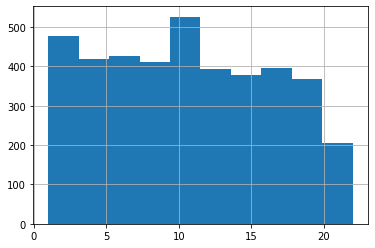

In [31]:
df['tenure'].hist();

In [32]:
#Add the age column to the dataset
import datetime as dt

now = pd.Timestamp('now')

df["DOB"] = pd.to_datetime(df["DOB"], format = "%m%d%y") #formating the "DOB" 
df["DOB"] = df["DOB"].where(df["DOB"]<now, df["DOB"] - np.timedelta64(100, "Y"))
df["AGE"] = (now - df["DOB"]).astype("<m8[Y]")
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,AGE
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,66.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,39.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66.0
3,4,Talbot,Dearle,Male,33,1961-10-03,Recruiting Manager,IT,Mass Customer,N,No,7.0,58.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,N,Yes,8.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,44.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,18.0
3997,3998,Sarene,Woolley,U,60,2001-07-13,Assistant Manager,IT,High Net Worth,N,No,11.0,18.0
3998,3999,Patrizius,Woolley,Male,11,1973-10-24,Assistant Manager,Manufacturing,Affluent Customer,N,Yes,10.0,46.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3998 non-null   int64         
 1   first_name                           3998 non-null   object        
 2   last_name                            3998 non-null   object        
 3   gender                               3998 non-null   object        
 4   past_3_years_bike_related_purchases  3998 non-null   int64         
 5   DOB                                  3998 non-null   datetime64[ns]
 6   job_title                            3998 non-null   object        
 7   job_industry_category                3998 non-null   object        
 8   wealth_segment                       3998 non-null   object        
 9   deceased_indicator                   3998 non-null   object        
 10  owns_car    

In [34]:
#Get rid of the decimals in dataset 
float_values = ["tenure", "AGE"]
for label, content in df.items():
    for i in float_values:
        if i == label:
            df[label] = content.astype(int)

In [35]:
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,AGE
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,66
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,39
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,66
3,4,Talbot,Dearle,Male,33,1961-10-03,Recruiting Manager,IT,Mass Customer,N,No,7,58
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,N,Yes,8,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19,44
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1,18
3997,3998,Sarene,Woolley,U,60,2001-07-13,Assistant Manager,IT,High Net Worth,N,No,11,18
3998,3999,Patrizius,Woolley,Male,11,1973-10-24,Assistant Manager,Manufacturing,Affluent Customer,N,Yes,10,46


In [36]:
# Save the dataset into csv file 
df.to_csv('./new_file.csv', index = False)

In [37]:
df_2 = pd.read_csv("new_file.csv")
df_2

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,AGE
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,66
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,39
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,66
3,4,Talbot,Dearle,Male,33,1961-10-03,Recruiting Manager,IT,Mass Customer,N,No,7,58
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,N,Yes,8,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19,44
3994,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1,18
3995,3998,Sarene,Woolley,U,60,2001-07-13,Assistant Manager,IT,High Net Worth,N,No,11,18
3996,3999,Patrizius,Woolley,Male,11,1973-10-24,Assistant Manager,Manufacturing,Affluent Customer,N,Yes,10,46
